In [7]:
import pandas as pd
import matplotlib.pyplot as plt
import os
import seaborn as sns
from matplotlib.backends.backend_pdf import PdfPages
import subprocess
import numpy as np
from pylab import rcParams

In [8]:
def savefig(name, **kwargs):
    fn = "../../paper/fig/{}.pdf".format(name)
    pp = PdfPages(fn)
    pp.savefig(dpi=1200, bbox_inches="tight", **kwargs)
    pp.close()
    print("saving and cropping ", fn)
    subprocess.run(["pdfcrop", fn, fn])

In [9]:
# us -> MHz
reference_frequency_per_time_unit = 2.5E3
_time = "Transition latency [µs]"
_start = "Original Frequency [GHz]"
_target = "Target Frequency [GHz]"
_transition = "Transition"
frequencies = [2500000,2200000,1500000]

/home/rschoene/projekte/paper/2020-rome-ee/measurements/ftalat
18128 valid
time [us]  2500000 --> 2200000 : time-long                  98.02
abs. time                   0.00
Transition latency [µs]    96.95
dtype: float64 time-long                  8.522650e+02
abs. time                  3.412494e+08
Transition latency [µs]    8.510900e+02
dtype: float64 time-long                  1.994010e+03
abs. time                  6.905409e+08
Transition latency [µs]    1.992810e+03
dtype: float64
looking for 9.064 entries
min= 165
max= 1399


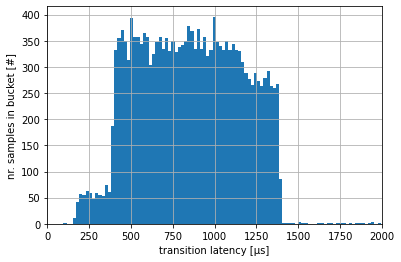

56040 valid
time [us]  2500000 --> 1500000 : time-long                  399.43
abs. time                    0.00
Transition latency [µs]    398.25
dtype: float64 time-long                  9.026850e+02
abs. time                  3.464378e+08
Transition latency [µs]    9.014500e+02
dtype: float64 time-long                  2.015190e+03
abs. time                  6.928539e+08
Transition latency [µs]    2.014030e+03
dtype: float64
looking for 28.02 entries
min= 398
max= 1407


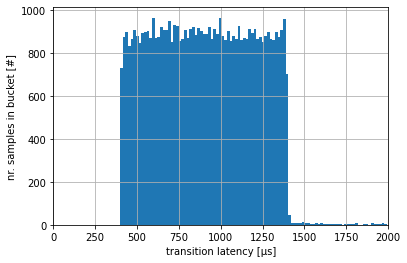

8503 valid
time [us]  2200000 --> 2500000 : time-long                  1.57
abs. time                  0.00
Transition latency [µs]    0.57
dtype: float64 time-long                  8.602700e+02
abs. time                  3.335543e+08
Transition latency [µs]    8.589800e+02
dtype: float64 time-long                  1.429370e+03
abs. time                  6.669087e+08
Transition latency [µs]    1.428210e+03
dtype: float64
looking for 4.2515 entries
min= 1
max= 1428


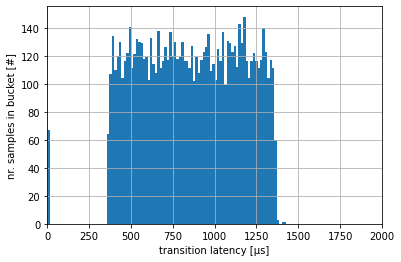

65284 valid
time [us]  2200000 --> 1500000 : time-long                   391.21
abs. time                  9999.80
Transition latency [µs]     389.66
dtype: float64 time-long                  8.930400e+02
abs. time                  3.467735e+08
Transition latency [µs]    8.917250e+02
dtype: float64 time-long                  1.886210e+03
abs. time                  6.938732e+08
Transition latency [µs]    1.885020e+03
dtype: float64
looking for 32.642 entries
min= 390
max= 1396


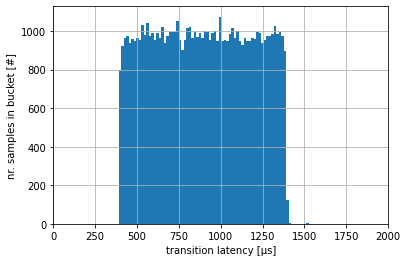

36375 valid
time [us]  1500000 --> 2500000 : time-long                    308.74
abs. time                  10621.81
Transition latency [µs]      306.78
dtype: float64 time-long                  8.727600e+02
abs. time                  3.472615e+08
Transition latency [µs]    8.708300e+02
dtype: float64 time-long                  1.754849e+04
abs. time                  6.934879e+08
Transition latency [µs]    1.754391e+04
dtype: float64
looking for 18.1875 entries
min= 365
max= 1371


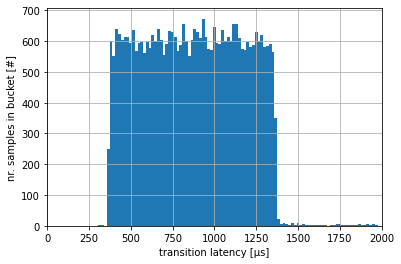

34646 valid
time [us]  1500000 --> 2200000 : time-long                    363.12
abs. time                  17001.55
Transition latency [µs]      361.22
dtype: float64 time-long                  8.656450e+02
abs. time                  3.439967e+08
Transition latency [µs]    8.637050e+02
dtype: float64 time-long                  1.785291e+04
abs. time                  6.930139e+08
Transition latency [µs]    1.784803e+04
dtype: float64
looking for 17.323 entries
min= 362
max= 1370


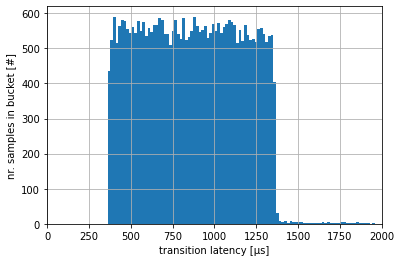

[[0, 1399, 1407], [1428, 0, 1396], [1371, 1370, 0]]


In [10]:
print (os.getcwd())

datas=[]
a=[]
a.append([0,0,0])
a.append([0,0,0])
a.append([0,0,0])

for start_index, start in enumerate(frequencies):
    datas_inner=[]
    for target_index, target in enumerate(frequencies):
        if start == target:
            continue
        #data = pd.read_csv('../'+str(start)+'_'+str(target)+'-out_random_100000.txt', sep='\t',usecols=[2],comment='#')
        data = pd.read_csv(str(start)+'_'+str(target)+'-out_random_100000.txt', sep='\t',comment='#')
        data=data.rename(columns={"time-short": _time})
        # to us
        data = data.apply(lambda x:x/reference_frequency_per_time_unit)

        data=data[data[_time].shift(-1)>0]
        data=data[data[_time]>0]

        valid=len(data)
        print(valid, 'valid')

        print("time [us] ",start,'-->',target,':', data.min(),data.median(),data.max())
        nums=[]
        print('looking for',valid/2000,'entries')
        for k in range(1,10000):
            tmp=data[data[_time]>=k]
            tmp=tmp[tmp[_time]<(k+1)]
            if len(tmp)>valid/10000:
                print('min=',k)
                a[start_index][target_index]=k
                break

        for k in range(10000,10,-1):
            tmp=data[data[_time]>=k]
            tmp=tmp[tmp[_time]<(k+1)]
            if len(tmp)>valid/10000:
                print('max=',k)
                a[start_index][target_index]=k
                break
        data=data[data[_time]<2000]

        ax=plt.gca()
        ax.set_xlim(0,2000)
        ax.set_ylabel('nr. samples in bucket [#]')
        ax.set_xlabel('transition latency [µs]')
        data[_time].hist(bins=100,ax=ax)
        
        filename = 'pstate-random'+str(int(start/1000))+'-'+str(int(target/1000))+'.pdf'
    
        plt.savefig(filename, dpi=300, format='pdf') 
        plt.show()
        datas_inner.append(data)
    datas.append(datas_inner)
print (a)


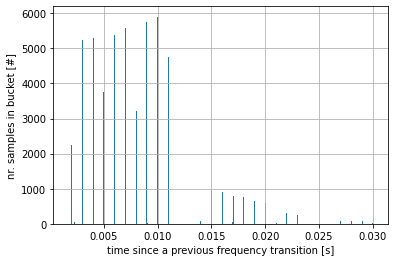

In [11]:
data = pd.read_csv('2200000_1500000-out_random_100000.txt', sep='\t',usecols=[1],comment='#')
data=data.rename(columns={"abs. time": "absolute time since last switch [s]"})
#to us
data=data.apply(lambda x:x/2.5E9)
data=data.diff()
data=data[data['absolute time since last switch [s]'].shift(-1)>0]
data=data[data['absolute time since last switch [s]']!=0]
data=data[data['absolute time since last switch [s]']<0.03]

ax=plt.gca()
ax.set_ylabel('nr. samples in bucket [#]')
ax.set_xlabel('time since a previous frequency transition [s]')
data['absolute time since last switch [s]'].hist(bins=500,ax=ax)
filename = 'pstate-absolute-time-2200-1500.pdf'
    
plt.savefig(filename, dpi=300, format='pdf') 
plt.show()

In [12]:
dfs = []
for start in frequencies:
    for target in frequencies:
        if start == target:
            continue
        #data = pd.read_csv('../'+str(start)+'_'+str(target)+'-out_random_100000.txt', sep='\t',usecols=[2],comment='#')
        df0 = pd.read_csv(str(start)+'_'+str(target)+'-out_random_100000.txt', sep='\t',comment='#')
        df0[_time] = df0["time-short"] / reference_frequency_per_time_unit
        df0[_start] = start / 1e6
        df0[_target] = target / 1e6
        df0[_transition] = "{} GHz -> {} GHz".format(start/1e6, target/1e6)

        df0=df0[df0[_time].shift(-1)>0]
        df0=df0[df0[_time]>0]

        dfs.append(df0)

df = pd.concat(dfs)

In [13]:
dfx = df[df[_transition].isin(
    ["2.2 GHz -> 1.5 GHz", "1.5 GHz -> 2.2 GHz", "2.5 GHz -> 2.2 GHz"])]
    #["1.5 GHz -> 2.2 GHz",])]

(0.0, 2000.0)

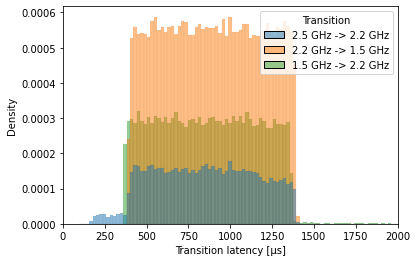

In [14]:
sns.histplot(
    data=dfx,
    x=_time,
    hue= _transition,
    stat="density",
)
plt.gca().set_xlim(0,2000)

2.2 GHz -> 1.5 GHz 65284
1.5 GHz -> 2.2 GHz 34646
2.5 GHz -> 2.2 GHz 18128


(0.0, 2000.0)

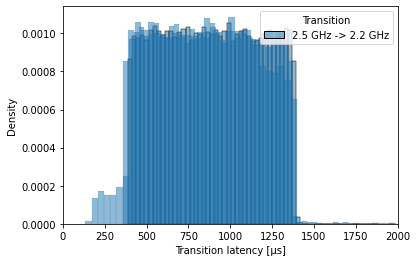

In [15]:
for tt in ["2.2 GHz -> 1.5 GHz", "1.5 GHz -> 2.2 GHz", "2.5 GHz -> 2.2 GHz"]:
    print(tt, len(dfx[dfx[_transition] == tt]))
    sns.histplot(
        data=dfx[dfx[_transition] == tt],
        x=_time,
        hue= _transition,
        stat="density",
    )
plt.gca().set_xlim(0,2000)

2.2 GHz -> 1.5 GHz 65284
saving and cropping  ../../paper/fig/pstate-random2200-1500.pdf


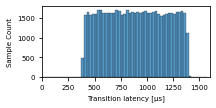

In [16]:
rcParams['figure.figsize'] = 3, 1.3
rcParams['font.size']="7"

tt = "2.2 GHz -> 1.5 GHz"
print(tt, len(dfx[dfx[_transition] == tt]))
sns.histplot(
    data=dfx[dfx[_transition] == tt],
    x=_time,
    stat="count",
    bins=range(0,1600,25)
)
plt.gca().set_ylabel("Sample Count")
plt.gca().set_xlim(0,1600)
savefig("pstate-random2200-1500")

(0.0, 1500.0)

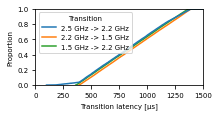

In [16]:
sns.ecdfplot(
    data=dfx,
    x=_time,
    hue= _transition,
)
plt.gca().set_xlim(0,1500)

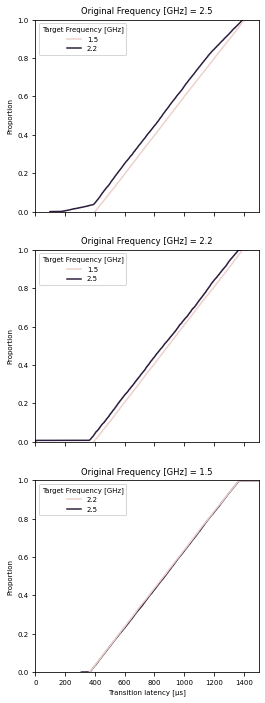

In [17]:
rcParams['figure.figsize'] = 4, 3*4
fig, axs = plt.subplots(3, 1, sharex=True)
for i, s in enumerate(df[_start].unique()):
    axs[i].set_title("{} = {}".format(_start, s))
    sns.ecdfplot(
        data=df[df[_start] == s],
        x=_time,
        hue=_target,
        ax=axs[i],
    )
    axs[i].set_xlim(0,1500)

In [ ]:
rcParams['figure.figsize'] = 4, 4
sns.ecdfplot(
    data=df,
    x=_time,
    hue= _transition,
)
plt.gca().set_xlim(0,1500)
